In [1]:
import fastai
fastai.__version__

'1.0.61'

In [2]:
from fastai.tabular import *

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv')]

In [5]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [6]:
target = 'salary'

In [7]:
cont,cat = cont_cat_split(df, dep_var=target)

In [8]:
cont

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [9]:
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [10]:
procs = [FillMissing, Categorify, Normalize]

In [11]:
test = (TabularList.from_df(df.iloc[800:1000],
                           path=path,
                           cat_names=cat, cont_names=cont,
                           procs=procs))

In [12]:
test.cont_names

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [13]:
test.cat_names

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [14]:
data = (TabularList.from_df(df, path=path, cat_names=cat, cont_names=cont, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=target)
                           .add_test(test,label=0)
                           .databunch())

In [15]:
data.cont_names

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [16]:
data.cat_names

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'education-num_na']

In [18]:
learn=tabular_learner(data,layers=[200,100],metrics=accuracy)

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


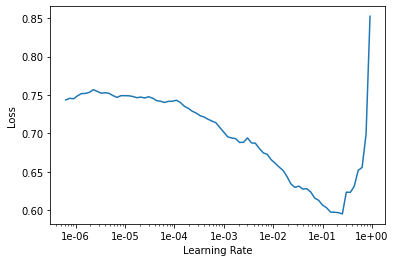

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(1,1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.320899,0.361219,0.835000,00:03


In [22]:
i=4
learn.predict(df.iloc[i])

(Category tensor(0), tensor(0), tensor([0.6883, 0.3117]))

In [23]:
df.iloc[i].salary

'<50k'

In [24]:
learn.show_results()

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,prediction
Private,Some-college,Divorced,Handlers-cleaners,Unmarried,White,Female,United-States,True,0.4701,-0.8793,-0.0312,-0.1459,-0.2164,-0.0356,<50k,<50k
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,True,0.5434,0.0290,-0.0312,1.8829,-0.2164,1.5843,>=50k,>=50k
Private,Assoc-voc,Divorced,#na#,Not-in-family,White,Male,United-States,True,-0.1896,1.7704,-0.0312,-0.1459,-0.2164,-0.1976,<50k,<50k
Federal-gov,Bachelors,Never-married,Tech-support,Not-in-family,White,Male,United-States,True,-0.9959,-1.3242,-0.0312,-0.1459,-0.2164,0.3694,<50k,<50k
Private,Bachelors,Married-civ-spouse,#na#,Husband,White,Male,United-States,True,-0.1163,-0.2389,-0.0312,-0.1459,-0.2164,-0.0356,<50k,<50k
